# 1. Import libreries

In [129]:
import warnings
import statistics as stat
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn import preprocessing 
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,classification_report,recall_score,precision_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb




# 2.  Load and drop useless columns

In [130]:
df_bank = pd.read_csv("BankChurners.csv")

In [131]:
df_bank.drop(['CLIENTNUM', 'Unnamed: 21'], axis = 'columns', inplace=True)

# 3. Exploding, search null, duplicates and modify some columns 

## 3.1 Shape of data

In [132]:
df_bank.shape

(10127, 20)

## 3.2 Types of data

In [133]:
df_bank.dtypes                     

Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

## 3.3 Statistical data

### 3.3.1 Numerical values

In [134]:
df_bank.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


### 3.3.2 Categorical values

In [135]:
df_bank.describe(include=[object])  

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,10127,10127,10127,10127,10127,10127
unique,2,2,7,4,6,4
top,Existing Customer,F,Graduate,Married,Less than $40K,Blue
freq,8500,5358,3128,4687,3561,9436


## 3.4 looking for null values

In [136]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [137]:
df_bank.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

## 3.5 Looking for duplicate values

In [138]:
df_bank.duplicated().sum()

0

## 3.6 Modify some columns 

In [139]:
df_bank["Attrition_Flag"]=df_bank["Attrition_Flag"].map({'Existing Customer': 0, 'Attrited Customer': 1})
df_bank["Gender"]=df_bank["Gender"].map({'M': 1, 'F': 0})

# 4.Feature enginnering and selection

## 4.1 Split in study variable and features

In [140]:
target = df_bank["Attrition_Flag"]

data = df_bank.drop(columns=["Attrition_Flag"])

## 4.2 Split in training data and test data

In [141]:
datos_entrena, datos_prueba, clase_entrena, clase_prueba = train_test_split(data,target,test_size=0.30,random_state=41)

## 4.3 Transform training set

In [142]:
df = datos_entrena
df

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
674,44,1,3,College,Unknown,$80K - $120K,Blue,35,6,1,2,6361.0,1292,5069.0,1.027,1571,38,0.520,0.203
1611,35,0,3,Uneducated,Married,Less than $40K,Blue,26,6,1,3,3187.0,2517,670.0,1.214,2072,33,0.833,0.790
7317,56,0,2,Uneducated,Single,Less than $40K,Blue,36,1,3,5,1883.0,400,1483.0,0.528,1954,45,0.500,0.212
2323,56,0,2,Uneducated,Married,Unknown,Blue,36,3,3,5,8242.0,0,8242.0,0.434,1559,44,0.467,0.000
3534,45,1,1,Graduate,Single,$60K - $80K,Blue,36,3,1,3,6022.0,1433,4589.0,0.955,3433,68,0.943,0.238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8513,51,0,1,High School,Married,Less than $40K,Blue,43,4,3,3,1665.0,1521,144.0,0.874,2878,45,0.452,0.914
5200,56,1,1,High School,Single,$80K - $120K,Blue,45,4,1,3,5070.0,0,5070.0,1.010,3651,76,0.652,0.000
4066,65,0,0,College,Divorced,Unknown,Blue,56,5,2,3,13666.0,0,13666.0,0.808,3998,70,1.000,0.000
931,51,0,0,Unknown,Divorced,Less than $40K,Blue,47,6,4,3,3049.0,1151,1898.0,0.533,4027,76,0.520,0.378


## 4.3.1 Separate numerical and categorical data

#### 4.3.1.1 Categorical data

In [143]:
categoricos_entreno = df.loc[:,df.dtypes==np.object]
categoricos_entreno2 = categoricos_entreno.reset_index()

categoricos_entreno2.drop(['index'], axis = 'columns', inplace=True) 
categoricos_entreno2

,Education_Level,Marital_Status,Income_Category,Card_Category
0,College,Unknown,$80K - $120K,Blue
1,Uneducated,Married,Less than $40K,Blue
2,Uneducated,Single,Less than $40K,Blue
3,Uneducated,Married,Unknown,Blue
4,Graduate,Single,$60K - $80K,Blue
...,...,...,...,...
7083,High School,Married,Less than $40K,Blue
7084,High School,Single,$80K - $120K,Blue
7085,College,Divorced,Unknown,Blue
7086,Unknown,Divorced,Less than $40K,Blue


#### 4.3.1.1 Numerical data

In [144]:
numericos_entreno = df.loc[:,df.dtypes!=np.object]
otro = numericos_entreno
otro

,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
674,44,1,3,35,6,1,2,6361.0,1292,5069.0,1.027,1571,38,0.520,0.203
1611,35,0,3,26,6,1,3,3187.0,2517,670.0,1.214,2072,33,0.833,0.790
7317,56,0,2,36,1,3,5,1883.0,400,1483.0,0.528,1954,45,0.500,0.212
2323,56,0,2,36,3,3,5,8242.0,0,8242.0,0.434,1559,44,0.467,0.000
3534,45,1,1,36,3,1,3,6022.0,1433,4589.0,0.955,3433,68,0.943,0.238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8513,51,0,1,43,4,3,3,1665.0,1521,144.0,0.874,2878,45,0.452,0.914
5200,56,1,1,45,4,1,3,5070.0,0,5070.0,1.010,3651,76,0.652,0.000
4066,65,0,0,56,5,2,3,13666.0,0,13666.0,0.808,3998,70,1.000,0.000
931,51,0,0,47,6,4,3,3049.0,1151,1898.0,0.533,4027,76,0.520,0.378


#### 4.3.1.2 Robust standardization for numerical data

In [145]:
scaler = RobustScaler() 
data_scaled = scaler.fit_transform(otro)

In [146]:
new = pd.DataFrame(data_scaled)
new

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-0.181818,1.0,0.5,-0.1,1.0,-1.0,0.0,0.220554,0.011193,0.190653,1.269357,-0.899207,-0.805556,-0.765957,0.051653
1,-1.000000,0.0,0.5,-1.0,1.0,-1.0,1.0,-0.156115,0.895830,-0.327212,2.085060,-0.705359,-0.944444,0.565957,1.264463
2,0.909091,0.0,0.0,0.0,-1.5,1.0,3.0,-0.310865,-0.632966,-0.231503,-0.907306,-0.751016,-0.611111,-0.851064,0.070248
3,0.909091,0.0,0.0,0.0,-0.5,1.0,3.0,0.443779,-0.921827,0.564189,-1.317339,-0.903850,-0.638889,-0.991489,-0.367769
4,-0.090909,1.0,-0.5,0.0,-0.5,-1.0,1.0,0.180324,0.113017,0.134146,0.955289,-0.178758,0.027778,1.034043,0.123967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7083,0.454545,0.0,-0.5,0.7,0.0,1.0,1.0,-0.336735,0.176566,-0.389134,0.601963,-0.393500,-0.611111,-1.055319,1.520661
7084,0.909091,1.0,-0.5,0.9,0.0,-1.0,1.0,0.067347,-0.921827,0.190770,1.195202,-0.094409,0.250000,-0.204255,-0.367769
7085,1.727273,0.0,-1.0,2.0,0.5,0.0,1.0,1.087462,-0.921827,1.202719,0.314068,0.039853,0.083333,1.276596,-0.367769
7086,0.454545,0.0,-1.0,1.1,1.0,2.0,1.0,-0.172492,-0.090630,-0.182648,-0.885496,0.051074,0.250000,-0.765957,0.413223


In [147]:
datos_entrena_num_standar = new.rename({0: 'Customer_Age', 1: 'Gender',2:'Dependent_count', 3: 'Months_on_book', 4: 'Total_Relationship_Count', 5: 'Months_Inactive_12_mon', 6: 'Contacts_Count_12_mon', 7: 'Credit_Limit', 8: 'Total_Revolving_Bal', 9: 'Avg_Open_To_Buy', 10: 'Total_Amt_Chng_Q4_Q1', 11: 'Total_Trans_Amt', 12: 'Total_Trans_Ct', 13: 'Total_Ct_Chng_Q4_Q1', 14: 'Avg_Utilization_Ratio'}, axis=1)
datos_entrena_num_standar

,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,-0.181818,1.0,0.5,-0.1,1.0,-1.0,0.0,0.220554,0.011193,0.190653,1.269357,-0.899207,-0.805556,-0.765957,0.051653
1,-1.000000,0.0,0.5,-1.0,1.0,-1.0,1.0,-0.156115,0.895830,-0.327212,2.085060,-0.705359,-0.944444,0.565957,1.264463
2,0.909091,0.0,0.0,0.0,-1.5,1.0,3.0,-0.310865,-0.632966,-0.231503,-0.907306,-0.751016,-0.611111,-0.851064,0.070248
3,0.909091,0.0,0.0,0.0,-0.5,1.0,3.0,0.443779,-0.921827,0.564189,-1.317339,-0.903850,-0.638889,-0.991489,-0.367769
4,-0.090909,1.0,-0.5,0.0,-0.5,-1.0,1.0,0.180324,0.113017,0.134146,0.955289,-0.178758,0.027778,1.034043,0.123967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7083,0.454545,0.0,-0.5,0.7,0.0,1.0,1.0,-0.336735,0.176566,-0.389134,0.601963,-0.393500,-0.611111,-1.055319,1.520661
7084,0.909091,1.0,-0.5,0.9,0.0,-1.0,1.0,0.067347,-0.921827,0.190770,1.195202,-0.094409,0.250000,-0.204255,-0.367769
7085,1.727273,0.0,-1.0,2.0,0.5,0.0,1.0,1.087462,-0.921827,1.202719,0.314068,0.039853,0.083333,1.276596,-0.367769
7086,0.454545,0.0,-1.0,1.1,1.0,2.0,1.0,-0.172492,-0.090630,-0.182648,-0.885496,0.051074,0.250000,-0.765957,0.413223


####  4.3.1.3 Union of categorical data with numerical data

In [148]:
union = pd.concat([datos_entrena_num_standar,categoricos_entreno2], axis = "columns")
union

,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Education_Level,Marital_Status,Income_Category,Card_Category
0,-0.181818,1.0,0.5,-0.1,1.0,-1.0,0.0,0.220554,0.011193,0.190653,1.269357,-0.899207,-0.805556,-0.765957,0.051653,College,Unknown,$80K - $120K,Blue
1,-1.000000,0.0,0.5,-1.0,1.0,-1.0,1.0,-0.156115,0.895830,-0.327212,2.085060,-0.705359,-0.944444,0.565957,1.264463,Uneducated,Married,Less than $40K,Blue
2,0.909091,0.0,0.0,0.0,-1.5,1.0,3.0,-0.310865,-0.632966,-0.231503,-0.907306,-0.751016,-0.611111,-0.851064,0.070248,Uneducated,Single,Less than $40K,Blue
3,0.909091,0.0,0.0,0.0,-0.5,1.0,3.0,0.443779,-0.921827,0.564189,-1.317339,-0.903850,-0.638889,-0.991489,-0.367769,Uneducated,Married,Unknown,Blue
4,-0.090909,1.0,-0.5,0.0,-0.5,-1.0,1.0,0.180324,0.113017,0.134146,0.955289,-0.178758,0.027778,1.034043,0.123967,Graduate,Single,$60K - $80K,Blue
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7083,0.454545,0.0,-0.5,0.7,0.0,1.0,1.0,-0.336735,0.176566,-0.389134,0.601963,-0.393500,-0.611111,-1.055319,1.520661,High School,Married,Less than $40K,Blue
7084,0.909091,1.0,-0.5,0.9,0.0,-1.0,1.0,0.067347,-0.921827,0.190770,1.195202,-0.094409,0.250000,-0.204255,-0.367769,High School,Single,$80K - $120K,Blue
7085,1.727273,0.0,-1.0,2.0,0.5,0.0,1.0,1.087462,-0.921827,1.202719,0.314068,0.039853,0.083333,1.276596,-0.367769,College,Divorced,Unknown,Blue
7086,0.454545,0.0,-1.0,1.1,1.0,2.0,1.0,-0.172492,-0.090630,-0.182648,-0.885496,0.051074,0.250000,-0.765957,0.413223,Unknown,Divorced,Less than $40K,Blue


####  4.3.1.3 Convert categorical data to numeric

In [149]:
datos_entrena_union =pd.get_dummies(data=union, drop_first=True)
datos_entrena_union

,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,-0.181818,1.0,0.5,-0.1,1.0,-1.0,0.0,0.220554,0.011193,0.190653,...,0,1,0,0,1,0,0,0,0,0
1,-1.000000,0.0,0.5,-1.0,1.0,-1.0,1.0,-0.156115,0.895830,-0.327212,...,0,0,0,0,0,1,0,0,0,0
2,0.909091,0.0,0.0,0.0,-1.5,1.0,3.0,-0.310865,-0.632966,-0.231503,...,1,0,0,0,0,1,0,0,0,0
3,0.909091,0.0,0.0,0.0,-0.5,1.0,3.0,0.443779,-0.921827,0.564189,...,0,0,0,0,0,0,1,0,0,0
4,-0.090909,1.0,-0.5,0.0,-0.5,-1.0,1.0,0.180324,0.113017,0.134146,...,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7083,0.454545,0.0,-0.5,0.7,0.0,1.0,1.0,-0.336735,0.176566,-0.389134,...,0,0,0,0,0,1,0,0,0,0
7084,0.909091,1.0,-0.5,0.9,0.0,-1.0,1.0,0.067347,-0.921827,0.190770,...,1,0,0,0,1,0,0,0,0,0
7085,1.727273,0.0,-1.0,2.0,0.5,0.0,1.0,1.087462,-0.921827,1.202719,...,0,0,0,0,0,0,1,0,0,0
7086,0.454545,0.0,-1.0,1.1,1.0,2.0,1.0,-0.172492,-0.090630,-0.182648,...,0,0,0,0,0,1,0,0,0,0


### 4.3.2 Data balance

In [150]:
smote = SMOTE()

In [151]:
datos_entrena_balance, clase_entrena_balance = smote.fit_resample(datos_entrena_union, clase_entrena)

In [152]:
datos_prueba_1 =pd.get_dummies(data=datos_prueba, drop_first=True)

In [153]:
datos_prueba_balance, clase_prueba_balance= smote.fit_resample(datos_prueba_1,clase_prueba) 

# 5. EDA

## 5.1 Attrition_Flag / dependent variable

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Count'>

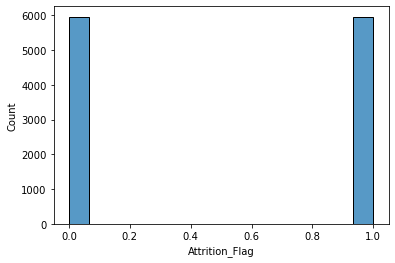

In [154]:
sns.histplot(x= clase_entrena_balance)

## 5.2 Customer_Age

<AxesSubplot:xlabel='Customer_Age', ylabel='Count'>

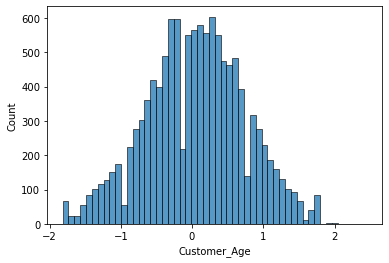

In [155]:
sns.histplot(x= datos_entrena_balance["Customer_Age"])



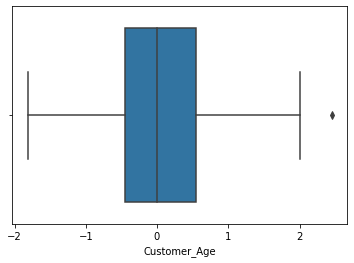

In [156]:
sns.boxplot(x=datos_entrena_union["Customer_Age"])
plt.show()

## 4.3 Gender

<AxesSubplot:xlabel='Gender', ylabel='Count'>

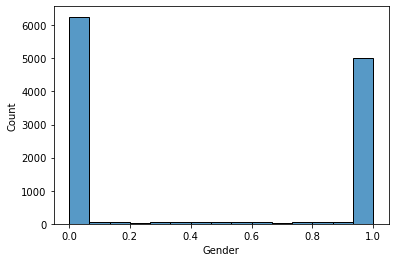

In [157]:
sns.histplot(x= datos_entrena_balance["Gender"])

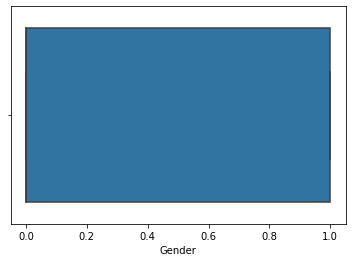

In [158]:
sns.boxplot(x=datos_entrena_balance["Gender"])
plt.show()

## 4.4 Dependent_count

<AxesSubplot:xlabel='Dependent_count', ylabel='Count'>

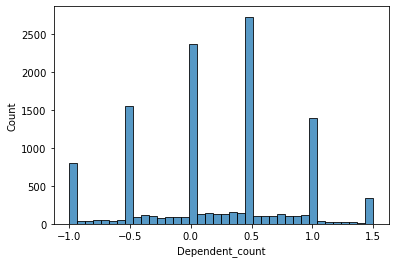

In [159]:
sns.histplot(x= datos_entrena_balance["Dependent_count"])

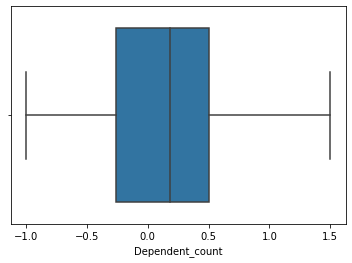

In [160]:
sns.boxplot(x=datos_entrena_balance["Dependent_count"])
plt.show()

## 4.5 Months_on_book

<AxesSubplot:xlabel='Months_on_book', ylabel='Count'>

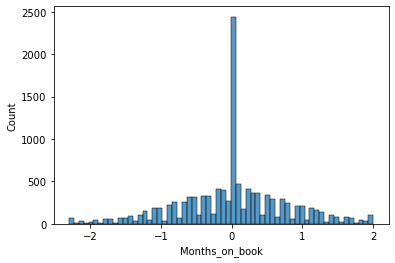

In [161]:
sns.histplot(x= datos_entrena_balance["Months_on_book"])

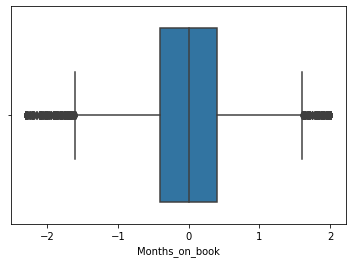

In [162]:
sns.boxplot(x=datos_entrena_balance["Months_on_book"])
plt.show()

## 4.6 Total_Relationship_Count


<AxesSubplot:xlabel='Total_Relationship_Count', ylabel='Count'>

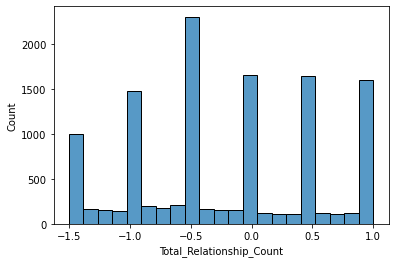

In [163]:
sns.histplot(x= datos_entrena_balance["Total_Relationship_Count"])

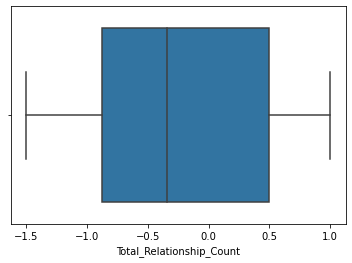

In [164]:
sns.boxplot(x=datos_entrena_balance["Total_Relationship_Count"])
plt.show()

# 4.7 Months_Inactive_12_mon

<AxesSubplot:xlabel='Months_Inactive_12_mon', ylabel='Count'>

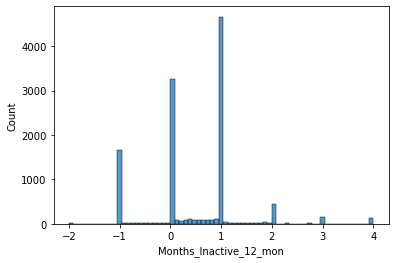

In [165]:
sns.histplot(x= datos_entrena_balance["Months_Inactive_12_mon"])

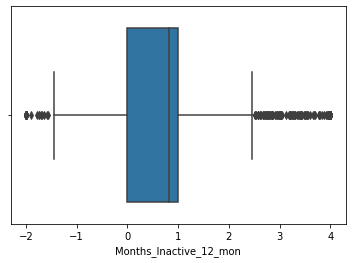

In [166]:
sns.boxplot(x=datos_entrena_balance["Months_Inactive_12_mon"])
plt.show()

### 4.7.1 Clean outliers

Previous Shape With Outlier:  (11916,)
Shape After Removing Outliers: (11916,)


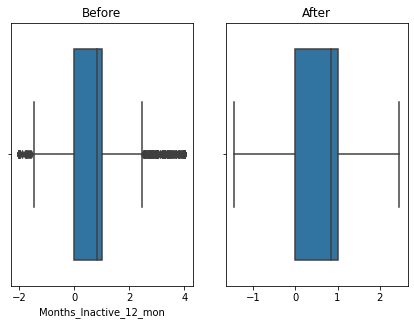

In [167]:

test = datos_entrena_balance["Months_Inactive_12_mon"]
moda=stat.mode(test)
fig, axes = plt.subplots(1,2)
plt.tight_layout(0.2)
print("Previous Shape With Outlier: ",test.shape)
sns.boxplot(test,orient='v',ax=axes[0])
axes[0].title.set_text("Before")


Q3 = test.quantile(0.75) #max
Q1 = test.quantile(0.25) #min
IQR = Q3 - Q1
min_value = Q1 - (1.5*IQR)
max_value = Q3 + (1.5*IQR)

test = np.where(test>max_value,moda,test)
test = np.where(test<min_value,moda,test)


print("Shape After Removing Outliers:", test.shape)

sns.boxplot(test,orient='v',ax=axes[1])
axes[1].title.set_text("After")
plt.show()

datos_entrena_balance["Months_Inactive_12_mon"] = test

<AxesSubplot:xlabel='Months_Inactive_12_mon', ylabel='Count'>

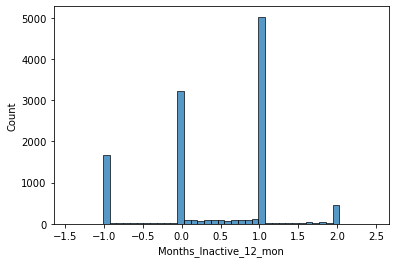

In [168]:
sns.histplot(x= datos_entrena_balance["Months_Inactive_12_mon"])

## 4.8 Contacts_Count_12_mon

<AxesSubplot:xlabel='Contacts_Count_12_mon', ylabel='Count'>

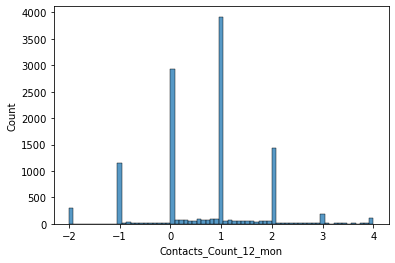

In [169]:
sns.histplot(x= datos_entrena_balance["Contacts_Count_12_mon"])

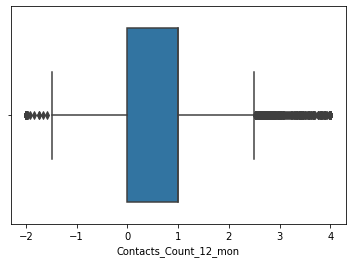

In [170]:
sns.boxplot(x=datos_entrena_balance["Contacts_Count_12_mon"])
plt.show()

### 4.8.1 Clean outliers

Previous Shape With Outlier:  (11916,)
Shape After Removing Outliers: (11916,)


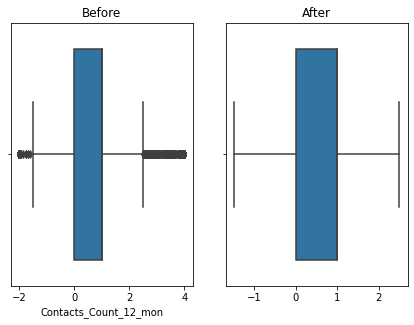

In [171]:
test = datos_entrena_balance["Contacts_Count_12_mon"]
moda=stat.mode(test)
fig, axes = plt.subplots(1,2)
plt.tight_layout(0.2)
print("Previous Shape With Outlier: ",test.shape)
sns.boxplot(test,orient='v',ax=axes[0])
axes[0].title.set_text("Before")


Q3 = test.quantile(0.75) #max
Q1 = test.quantile(0.25) #min
IQR = Q3 - Q1
min_value = Q1 - (1.5*IQR)
max_value = Q3 + (1.5*IQR)

test = np.where(test>max_value,moda,test)
test = np.where(test<min_value,moda,test)


print("Shape After Removing Outliers:", test.shape)

sns.boxplot(test,orient='v',ax=axes[1])
axes[1].title.set_text("After")
plt.show()
datos_entrena_balance["Contacts_Count_12_mon"] = test

<AxesSubplot:xlabel='Contacts_Count_12_mon', ylabel='Count'>

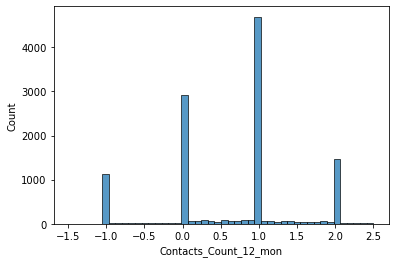

In [172]:
sns.histplot(x= datos_entrena_balance["Contacts_Count_12_mon"])

## 4.9 Credit_Limit

<AxesSubplot:xlabel='Credit_Limit', ylabel='Count'>

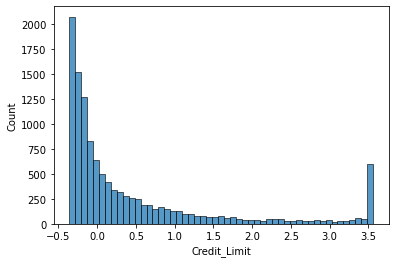

In [173]:
sns.histplot(x= datos_entrena_balance["Credit_Limit"])

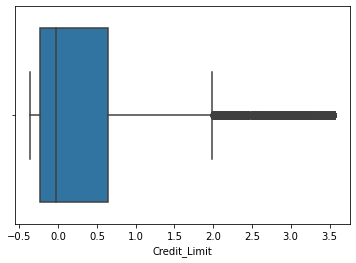

In [174]:
sns.boxplot(x=datos_entrena_balance["Credit_Limit"])
plt.show()

### 4.9.1 Clean outliers

Previous Shape With Outlier:  (11916,)
Shape After Removing Outliers: (11916,)


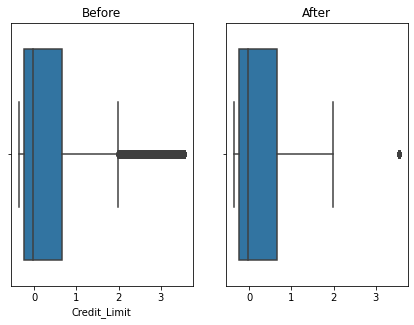

In [175]:

test = datos_entrena_balance["Credit_Limit"]
moda=stat.mode(test)
fig, axes = plt.subplots(1,2)
plt.tight_layout(0.2)
print("Previous Shape With Outlier: ",test.shape)
sns.boxplot(test,orient='v',ax=axes[0])
axes[0].title.set_text("Before")


Q3 = test.quantile(0.75) #max
Q1 = test.quantile(0.25) #min
IQR = Q3 - Q1
min_value = Q1 - (1.5*IQR)
max_value = Q3 + (1.5*IQR)

test = np.where(test>max_value,moda,test)


print("Shape After Removing Outliers:", test.shape)

sns.boxplot(test,orient='v',ax=axes[1])
axes[1].title.set_text("After")
plt.show()
datos_entrena_balance["Credit_Limit"] = test

<AxesSubplot:xlabel='Credit_Limit', ylabel='Count'>

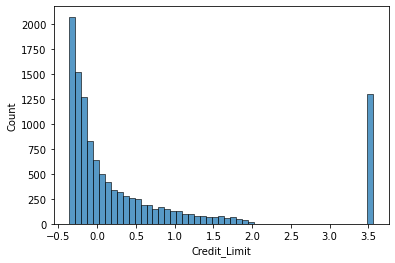

In [176]:
sns.histplot(x= datos_entrena_balance["Credit_Limit"])

## 4.10 Total_Revolving_Bal

<AxesSubplot:xlabel='Total_Revolving_Bal', ylabel='Count'>

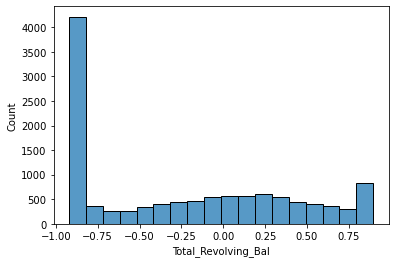

In [177]:
sns.histplot(x= datos_entrena_balance["Total_Revolving_Bal"])

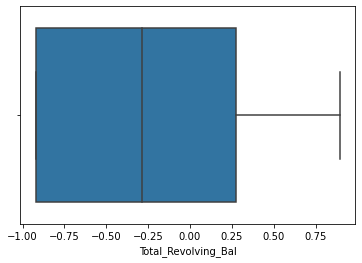

In [178]:
sns.boxplot(x=datos_entrena_balance["Total_Revolving_Bal"])
plt.show()

## 4.11 Avg_Open_To_Buy

<AxesSubplot:xlabel='Avg_Open_To_Buy', ylabel='Count'>

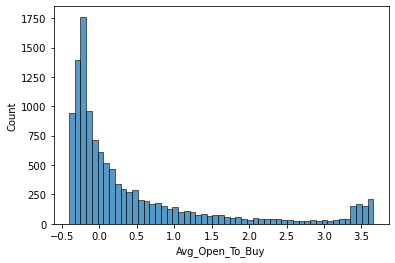

In [179]:
sns.histplot(x= datos_entrena_balance["Avg_Open_To_Buy"])

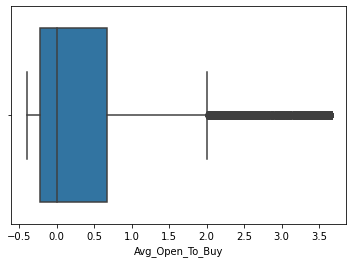

In [180]:
sns.boxplot(x=datos_entrena_balance["Avg_Open_To_Buy"])
plt.show()

## 4.12 Total_Amt_Chng_Q4_Q1

<AxesSubplot:xlabel='Total_Amt_Chng_Q4_Q1', ylabel='Count'>

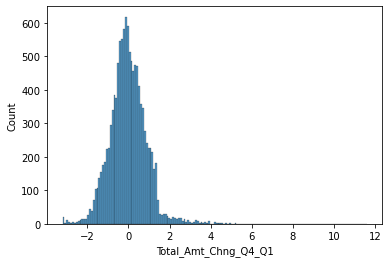

In [181]:
sns.histplot(x= datos_entrena_balance["Total_Amt_Chng_Q4_Q1"])

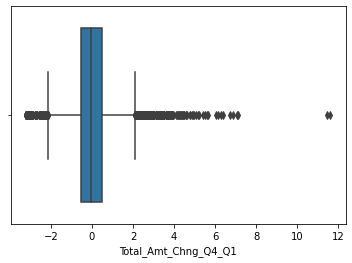

In [182]:
sns.boxplot(x=datos_entrena_balance["Total_Amt_Chng_Q4_Q1"])
plt.show()

### 4.12.1 Clean outliers

Previous Shape With Outlier:  (11916,)


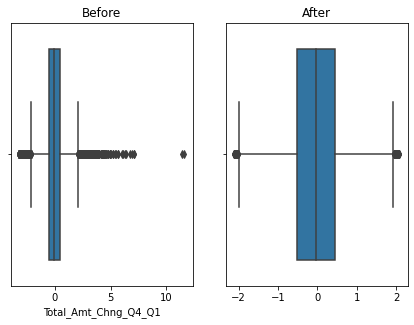

In [183]:

test = datos_entrena_balance["Total_Amt_Chng_Q4_Q1"]
moda=stat.mode(test)
fig, axes = plt.subplots(1,2)
plt.tight_layout(0.2)
print("Previous Shape With Outlier: ",test.shape)
sns.boxplot(test,orient='v',ax=axes[0])
axes[0].title.set_text("Before")


Q3 = test.quantile(0.75) #max
Q1 = test.quantile(0.25) #min
IQR = Q3 - Q1
min_value = Q1 - (1.5*IQR)
max_value = Q3 + (1.5*IQR)

test = np.where(test>max_value,moda,test)
test = np.where(test<min_value,moda,test)


sns.boxplot(test,orient='v',ax=axes[1])
axes[1].title.set_text("After")
plt.show()
datos_entrena_balance["Total_Amt_Chng_Q4_Q1"] = test

<AxesSubplot:xlabel='Total_Amt_Chng_Q4_Q1', ylabel='Count'>

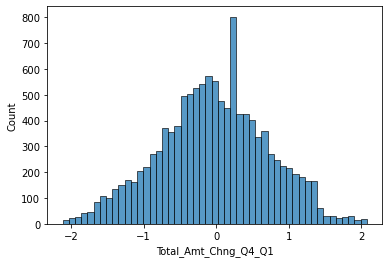

In [184]:
sns.histplot(x= datos_entrena_balance["Total_Amt_Chng_Q4_Q1"])

## 4.13 Total_Trans_Amt

<AxesSubplot:xlabel='Total_Trans_Amt', ylabel='Count'>

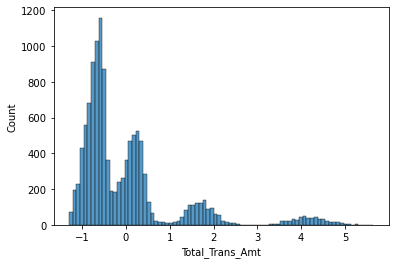

In [185]:
sns.histplot(x= datos_entrena_balance["Total_Trans_Amt"])

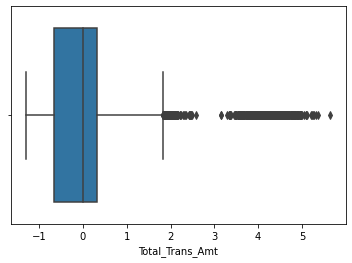

In [186]:
sns.boxplot(x=datos_entrena_union["Total_Trans_Amt"])
plt.show()

### 4.13.1 Clean outliers

Previous Shape With Outlier:  (11916,)


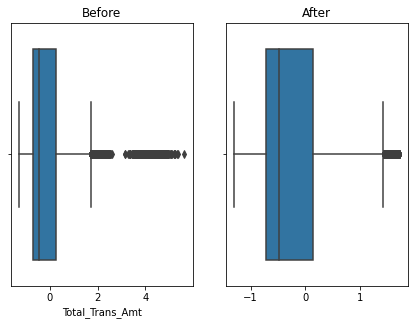

In [187]:

test = datos_entrena_balance["Total_Trans_Amt"]
moda=stat.mode(test)
fig, axes = plt.subplots(1,2)
plt.tight_layout(0.2)
print("Previous Shape With Outlier: ",test.shape)
sns.boxplot(test,orient='v',ax=axes[0])
axes[0].title.set_text("Before")


Q3 = test.quantile(0.75) #max
Q1 = test.quantile(0.25) #min
IQR = Q3 - Q1
min_value = Q1 - (1.5*IQR)
max_value = Q3 + (1.5*IQR)

test = np.where(test>max_value,moda,test)
test = np.where(test<min_value,moda,test)


sns.boxplot(test,orient='v',ax=axes[1])
axes[1].title.set_text("After")
plt.show()
datos_entrena_balance["Total_Trans_Amt"] =test

<AxesSubplot:xlabel='Total_Trans_Amt', ylabel='Count'>

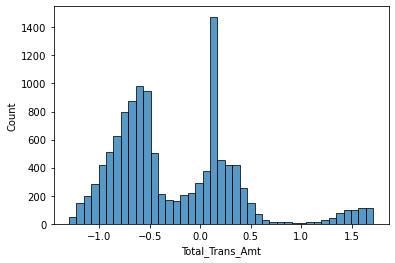

In [188]:
sns.histplot(x= datos_entrena_balance["Total_Trans_Amt"])

## 4.14 Total_Trans_Ct

<AxesSubplot:xlabel='Total_Trans_Ct', ylabel='Count'>

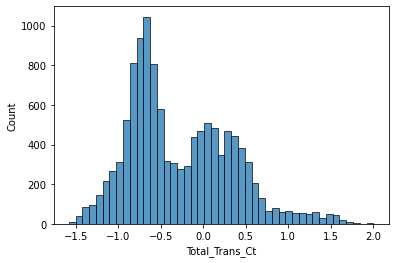

In [189]:
sns.histplot(x= datos_entrena_balance["Total_Trans_Ct"])

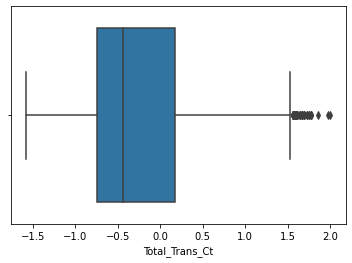

In [190]:
sns.boxplot(x=datos_entrena_balance["Total_Trans_Ct"])
plt.show()

### 4.14.1 Clean outliers

Previous Shape With Outlier:  (11916,)


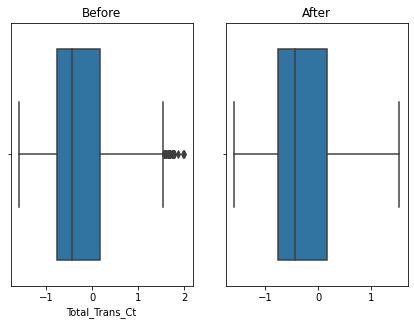

In [191]:

test = datos_entrena_balance["Total_Trans_Ct"]
moda=stat.mode(test)
fig, axes = plt.subplots(1,2)
plt.tight_layout(0.2)
print("Previous Shape With Outlier: ",test.shape)
sns.boxplot(test,orient='v',ax=axes[0])
axes[0].title.set_text("Before")

Q3 = test.quantile(0.75) #max
Q1 = test.quantile(0.25) #min
IQR = Q3 - Q1
min_value = Q1 - (1.5*IQR)
max_value = Q3 + (1.5*IQR)

test = np.where(test>max_value,moda,test)


sns.boxplot(test,orient='v',ax=axes[1])
axes[1].title.set_text("After")
plt.show()
datos_entrena_balance["Total_Trans_Ct"] = test


<AxesSubplot:xlabel='Total_Trans_Ct', ylabel='Count'>

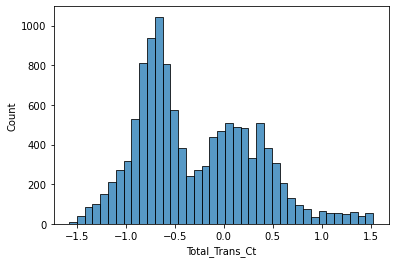

In [192]:
sns.histplot(x= datos_entrena_balance["Total_Trans_Ct"])

## 4.15 Total_Ct_Chng_Q4_Q1

<AxesSubplot:xlabel='Total_Ct_Chng_Q4_Q1', ylabel='Count'>

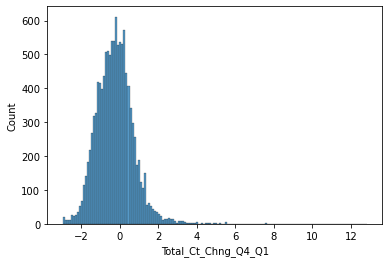

In [193]:
sns.histplot(x= datos_entrena_balance["Total_Ct_Chng_Q4_Q1"])

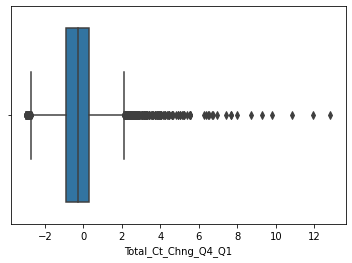

In [194]:
sns.boxplot(x=datos_entrena_balance["Total_Ct_Chng_Q4_Q1"])
plt.show()

### 4.15.1 Clean outliers

Previous Shape With Outlier:  (11916,)
Shape After Removing Outliers: (11916,)


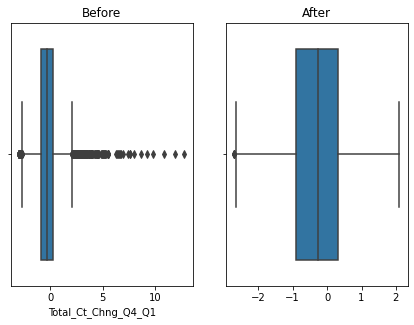

In [195]:

test = datos_entrena_balance["Total_Ct_Chng_Q4_Q1"]
moda=stat.mode(test)
fig, axes = plt.subplots(1,2)
plt.tight_layout(0.2)
print("Previous Shape With Outlier: ",test.shape)
sns.boxplot(test,orient='v',ax=axes[0])
axes[0].title.set_text("Before")

########### HANDLING OUTLIER ######
Q3 = test.quantile(0.75) #max
Q1 = test.quantile(0.25) #min
IQR = Q3 - Q1
min_value = Q1 - (1.5*IQR)
max_value = Q3 + (1.5*IQR)

test = np.where(test>max_value,moda,test)
test = np.where(test<min_value,moda,test)

print("Shape After Removing Outliers:", test.shape)

sns.boxplot(test,orient='v',ax=axes[1])
axes[1].title.set_text("After")
plt.show()
datos_entrena_balance["Total_Ct_Chng_Q4_Q1"] = test

<AxesSubplot:xlabel='Total_Ct_Chng_Q4_Q1', ylabel='Count'>

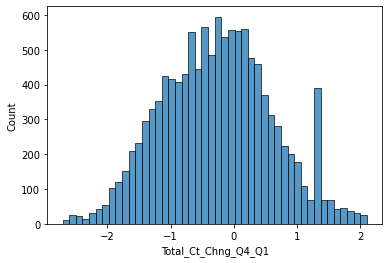

In [196]:
sns.histplot(x= datos_entrena_balance["Total_Ct_Chng_Q4_Q1"])

## 4.16 Avg_Utilization_Ratio

<AxesSubplot:xlabel='Avg_Utilization_Ratio', ylabel='Count'>

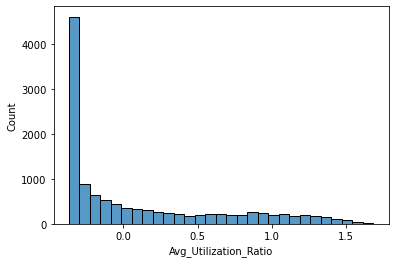

In [197]:
sns.histplot(x= datos_entrena_balance["Avg_Utilization_Ratio"])


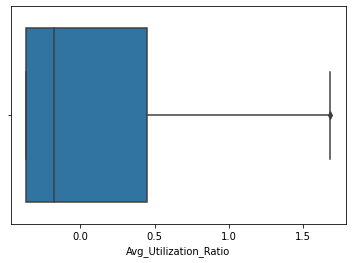

In [198]:
sns.boxplot(x=datos_entrena_balance["Avg_Utilization_Ratio"])
plt.show()

## 4.17 Correlations

In [199]:
matriz = datos_entrena_balance.corr(method="spearman")

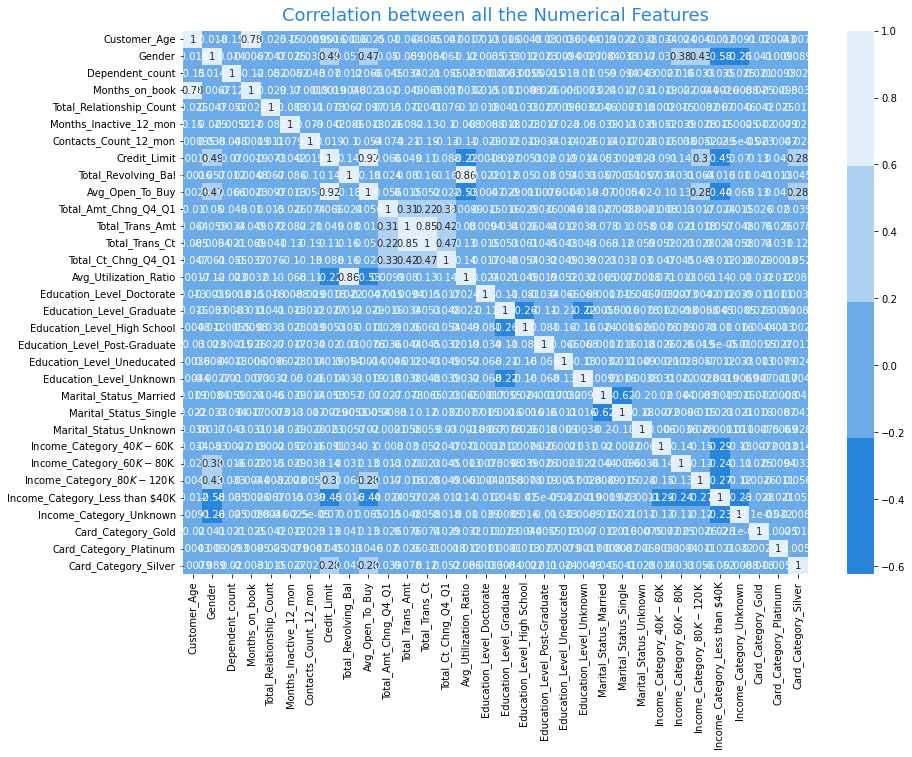

In [200]:
plt.figure(figsize=[14,10])
plt.title("Correlation between all the Numerical Features", size=18, pad=10, color='#2985dc')
sns.heatmap(matriz, cmap=['#2985dc', '#6cabe7','#b0d2f2','#e2effa'], annot=True)
plt.show()

In [201]:
def matriz_de_confusion(clases_reales, clases_predichas, titulo):
   
    matriz = confusion_matrix(clases_reales, clases_predichas)
    accuracy = accuracy_score(clases_reales, clases_predichas)
    precision = precision_score(clases_reales, clases_predichas)
    recall = recall_score(clases_reales, clases_predichas)
    f1 = f1_score(clases_reales, clases_predichas,average="macro")

    
    plt.figure(figsize=(4, 4))
    matriz = pd.DataFrame(matriz, 
                          columns=["0 : Existing ", "1 : Attrited "]) 
    plt.matshow(matriz, cmap="summer", vmin=0, vmax=20, fignum=1)
    plt.xticks(range(len(matriz.columns)), matriz.columns, rotation=45)
    plt.yticks(range(len(matriz.columns)), matriz.columns)
    etiquetas = (("True\nnegative", "False\npositive"), 
                 ("False\nnegative", "True\npositive"))
    plt.text(1.60, -0.30, titulo, fontsize=25, c="red")
    plt.text(2.1, 0.10, "Accuracy: %0.2f" % accuracy, fontsize=20)
    plt.text(2.1, 0.40, "Precision: %0.2f" % precision, fontsize=20)
    plt.text(2.1, 0.70, "Recall: %0.2f" % recall, fontsize=20)
    plt.text(2.1, 1.00, "F1_Macro: %0.2f" % f1, fontsize=20)
    
    for i in range(len(matriz.columns)):
        for j in range(len(matriz.columns)):
            plt.text(i, j + 0.14, str(matriz.iloc[i, j]),
                     fontsize=30, ha="center", va="center")
            plt.text(i, j - 0.25, etiquetas[i][j],
                     fontsize=11.5, ha="center", va="center")           
    plt.show()

# 5.  Applying models

## 5.1 Logistict Regresion

### 5.1.1 Call model

In [202]:
logistic = LogisticRegression()

### 5.1.2 Training model

In [203]:
logistic.fit(datos_entrena_balance, clase_entrena_balance) 

LogisticRegression()

In [204]:
pred_logistic = logistic.predict(datos_prueba_balance)

### 5.1.3 Metrics

#### 5.1.3.1 Score

In [205]:
accuracy = logistic.score(datos_prueba_balance, clase_prueba_balance) 
accuracy

0.5155389457120377

#### 5.1.3.2 Accuracy_score

In [206]:
acc = accuracy_score(clase_prueba_balance,pred_logistic)
acc

0.5155389457120377

#### 5.1.3.3 F1_score

In [207]:
f1 = f1_score(clase_prueba_balance,pred_logistic, average= None)
f1

array([0.21032382, 0.65058874])

#### 5.1.3.4 Classification_report

In [208]:
x_logistc= classification_report(clase_prueba_balance,pred_logistic)
print(x_logistc)

              precision    recall  f1-score   support

           0       0.57      0.13      0.21      2542
           1       0.51      0.90      0.65      2542

    accuracy                           0.52      5084
   macro avg       0.54      0.52      0.43      5084
weighted avg       0.54      0.52      0.43      5084



#### 5.1.3.5 CV

In [209]:
scores_logistc = cross_val_score(logistic,datos_entrena_balance, clase_entrena_balance, cv=5, scoring="f1_macro")

In [210]:
print(scores_logistc)

[0.78425977 0.91178841 0.90677075 0.9185744  0.91307586]


In [211]:
scores_logistc.mean()

0.8868938394861405

#### 5.1.3.6 Confusion matrix

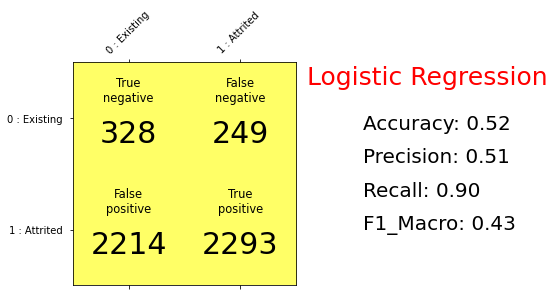

In [212]:
matriz_de_confusion(clase_prueba_balance,pred_logistic,"Logistic Regression")

#### 5.1.3.7 Roc curve

In [213]:
r_probs = [0 for _ in range(len(clase_prueba_balance))]
logist_probs = logistic.predict_proba(datos_prueba_balance)

In [214]:
logist_probs = logist_probs[:, 1]

In [215]:
r_auc = roc_auc_score(clase_prueba_balance, r_probs)
logist_auc = roc_auc_score(clase_prueba_balance, logist_probs)

In [216]:
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Logist Regresion : AUROC = %.3f' % (logist_auc))

Random (chance) Prediction: AUROC = 0.500
Logist Regresion : AUROC = 0.516


In [217]:
r_fpr, r_tpr, _ = roc_curve(clase_prueba_balance, r_probs)
logist_fpr, logist_tpr, _ = roc_curve(clase_prueba_balance, logist_probs)

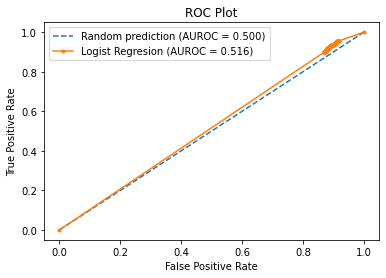

In [218]:
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(logist_fpr, logist_tpr, marker='.', label='Logist Regresion (AUROC = %0.3f)' % logist_auc)


# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

## 5.2 Decision tree

### 5.2.1 Call model

In [219]:
dec = DecisionTreeClassifier()

### 5.2.2 Training model

In [220]:
decision_tree=dec.fit(datos_entrena_balance, clase_entrena_balance)

### 5.2.3 Make predictions 

In [221]:
pred_dec = dec.predict(datos_prueba_balance)

### 5.2.4 Metrics

#### 5.2.4.1 Score

In [222]:
accuracy_dec = dec.score(datos_prueba_balance, clase_prueba_balance)
accuracy

0.5155389457120377

#### 5.2.4.2 Accuracy_score

In [223]:
acc_dec = accuracy_score(clase_prueba_balance,pred_dec)
acc_dec

0.41365066876475215

#### 5.2.4.3 F1_score

In [224]:
f1_dec = f1_score(clase_prueba_balance,pred_dec, average= None)
f1_dec

array([0.38826185, 0.43701605])

#### 5.2.4.4 Classification_report

In [225]:
x_dec= classification_report(clase_prueba_balance,pred_dec)
print(x_dec)

              precision    recall  f1-score   support

           0       0.41      0.37      0.39      2542
           1       0.42      0.46      0.44      2542

    accuracy                           0.41      5084
   macro avg       0.41      0.41      0.41      5084
weighted avg       0.41      0.41      0.41      5084



#### 5.2.4.5 CV

In [226]:
scores_tree = cross_val_score(dec,datos_entrena_balance, clase_entrena_balance, cv=5, scoring="f1_macro")

In [227]:
print(scores_tree)

[0.90294992 0.94207429 0.95508947 0.95046792 0.95047797]


In [228]:
scores_tree.mean()

0.9402119143553496

#### 5.2.4.6 Confusion matrix

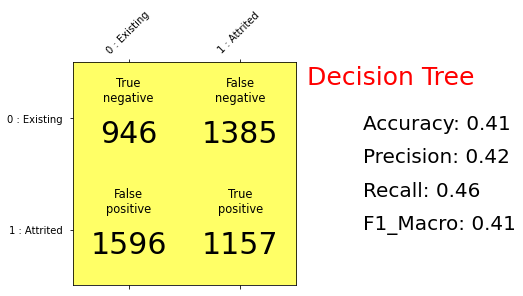

In [229]:
matriz_de_confusion(clase_prueba_balance,pred_dec,"Decision Tree")

#### 5.2.4.7 Roc curve

In [230]:
r_probs = [0 for _ in range(len(clase_prueba_balance))]
dec_probs = dec.predict_proba(datos_prueba_balance)

In [231]:
rf_probs = dec_probs[:, 1]

In [232]:
r_auc = roc_auc_score(clase_prueba_balance, r_probs)
dec_auc = roc_auc_score(clase_prueba_balance, rf_probs)

In [233]:
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Decision Tree: AUROC = %.3f' % (dec_auc))

Random (chance) Prediction: AUROC = 0.500
Decision Tree: AUROC = 0.414


In [234]:
r_fpr, r_tpr, _ = roc_curve(clase_prueba_balance, r_probs)
dec_fpr, dec_tpr, _ = roc_curve(clase_prueba_balance, rf_probs)

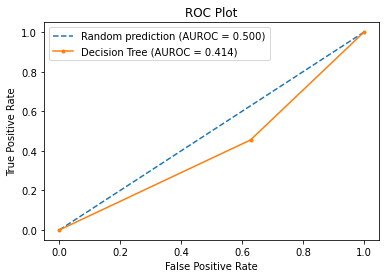

In [235]:
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(dec_fpr, dec_tpr, marker='.', label='Decision Tree (AUROC = %0.3f)' % dec_auc)


# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

## 5.3 Xgboost

### 5.3.1 Call model

In [236]:
xgb = xgb.XGBClassifier()

### 5.3.2 Training model

In [237]:
xgb.fit(datos_entrena_balance, clase_entrena_balance)

[15:15:54] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

### 5.3.3 Make predictions

In [238]:
pred_xgb = xgb.predict(datos_prueba_balance)

### 5.3.4 metrics

#### 5.3.4.1 Score

In [239]:
accuracy_xgb = xgb.score(datos_prueba_balance, clase_prueba_balance)
accuracy_xgb

0.5009834775767112

#### 5.3.4.2 Accuracy_score

In [240]:
acc_xgb = accuracy_score(clase_prueba_balance,pred_xgb)
acc_xgb

0.5009834775767112

#### 5.3.4.3 F1_score

In [241]:
f1_xgb = f1_score(clase_prueba_balance,pred_xgb, average= None)
f1_xgb

array([0.63710485, 0.20144791])

#### 5.3.4.4 Classification_report

In [242]:
x_xgb= classification_report(clase_prueba_balance,pred_xgb)
print(x_xgb)

              precision    recall  f1-score   support

           0       0.50      0.88      0.64      2542
           1       0.50      0.13      0.20      2542

    accuracy                           0.50      5084
   macro avg       0.50      0.50      0.42      5084
weighted avg       0.50      0.50      0.42      5084



#### 5.3.4.5 CV

In [243]:
scores_xgb = cross_val_score(xgb,datos_entrena_balance, clase_entrena_balance, cv=5, scoring="f1_macro")
warnings.filterwarnings("ignore")

[15:15:56] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:15:57] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:15:58] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:15:59] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation me

In [244]:
print(scores_xgb)

[0.86302125 0.98992815 0.98405135 0.98699008 0.9844715 ]


In [245]:
scores_xgb.mean()

0.9616924659194737

#### 5.3.4.6 Confusion matrix

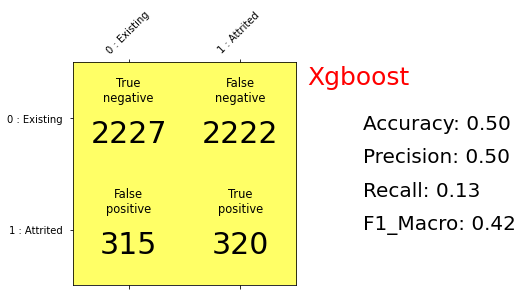

In [246]:
matriz_de_confusion(clase_prueba_balance,pred_xgb,"Xgboost")

#### 5.3.4.7 Roc curve

In [247]:
r_probs = [0 for _ in range(len(clase_prueba_balance))]
xgb_probs = xgb.predict_proba(datos_prueba_balance)

In [248]:
xgb_probs = xgb_probs[:, 1]

In [249]:
r_auc = roc_auc_score(clase_prueba_balance, r_probs)
xgb_auc = roc_auc_score(clase_prueba_balance, xgb_probs)

In [250]:
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Xgbosst: AUROC = %.3f' % (xgb_auc))

Random (chance) Prediction: AUROC = 0.500
Xgbosst: AUROC = 0.433


In [251]:
r_fpr, r_tpr, _ = roc_curve(clase_prueba_balance, r_probs)
xgb_fpr, xgb_tpr, _ = roc_curve(clase_prueba_balance, xgb_probs)

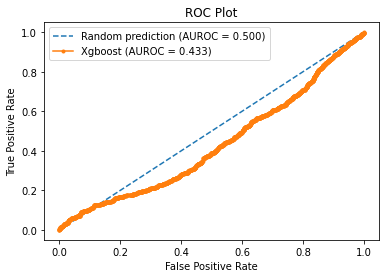

In [252]:
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(xgb_fpr, xgb_tpr, marker='.', label='Xgboost (AUROC = %0.3f)' % xgb_auc)


# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

## 5.4 All roc curves together

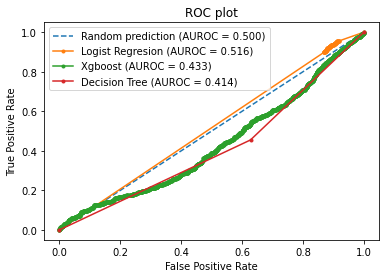

In [253]:
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(logist_fpr, logist_tpr, marker='.', label='Logist Regresion (AUROC = %0.3f)' % logist_auc)
plt.plot(xgb_fpr, xgb_tpr, marker='.', label='Xgboost (AUROC = %0.3f)' % xgb_auc)
plt.plot(dec_fpr, dec_tpr, marker='.', label='Decision Tree (AUROC = %0.3f)' % dec_auc)


# Title
plt.title('ROC plot')
# Axis labels
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
# Show legend
plt.legend() # 
# Show plot
plt.show()